In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [75]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [76]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
340,1232,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5000,NaN,S
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C


In [77]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [78]:
train_df.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
1%,9.900000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300


In [79]:
print(train_df.info())
print('*'*100)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count 

In [80]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Panula, Mrs. Juha (Maria Emilia Ojala)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [81]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Univariate Analysis

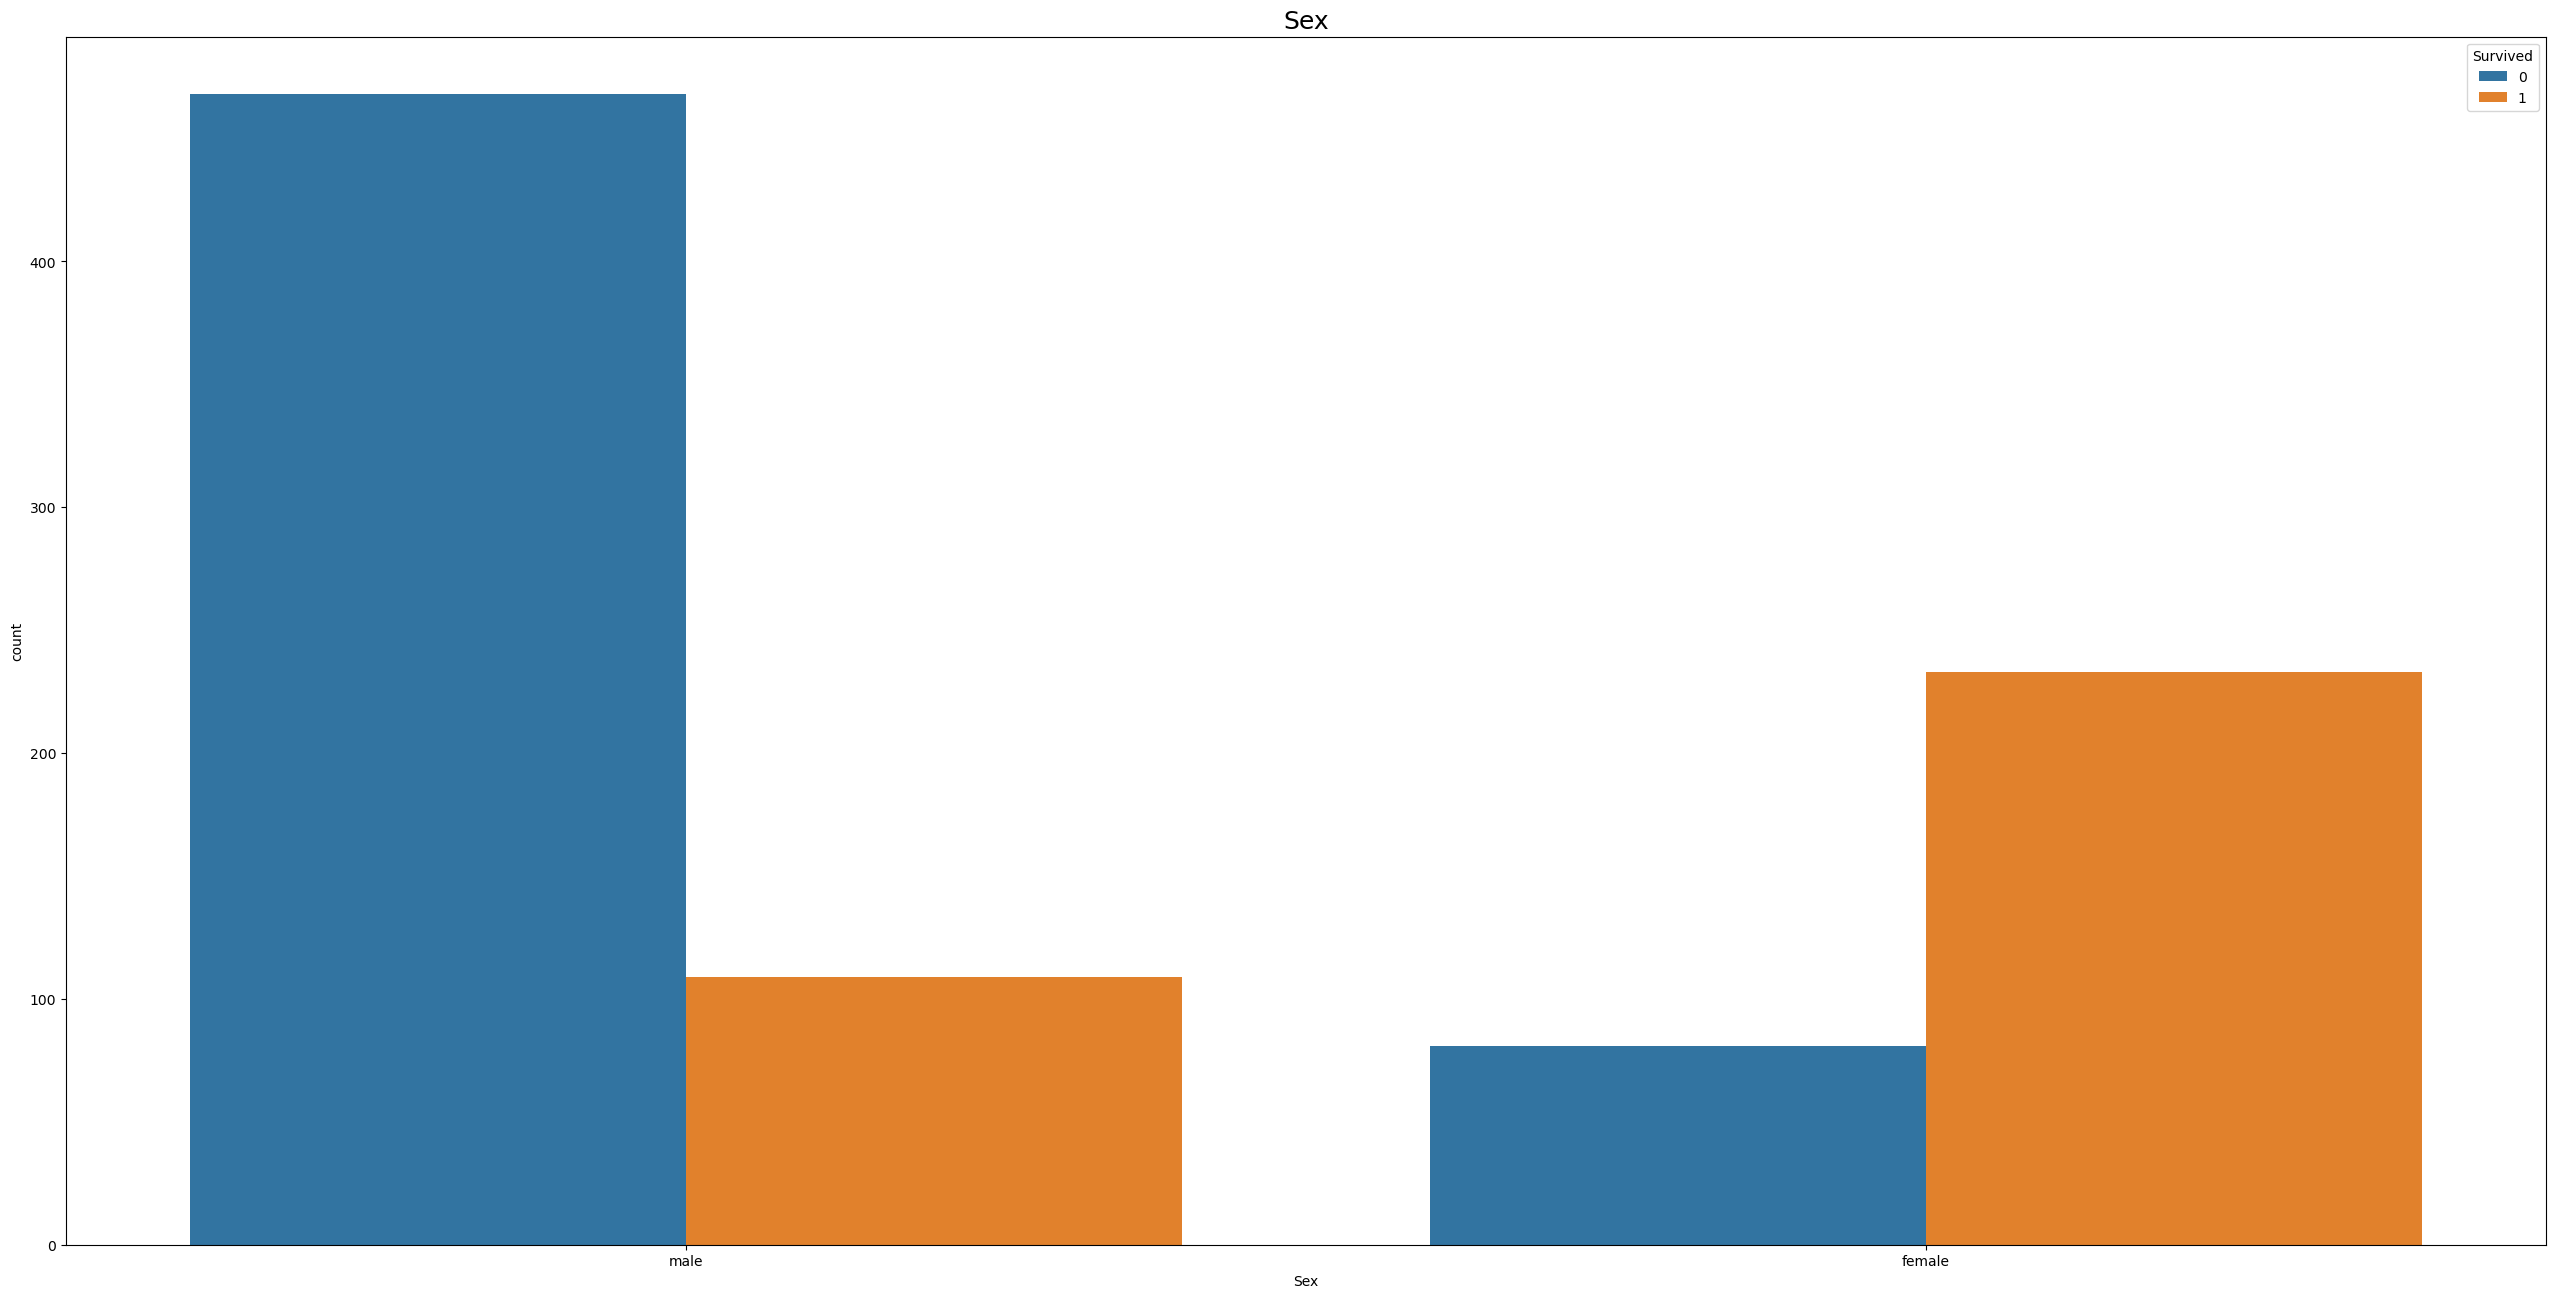

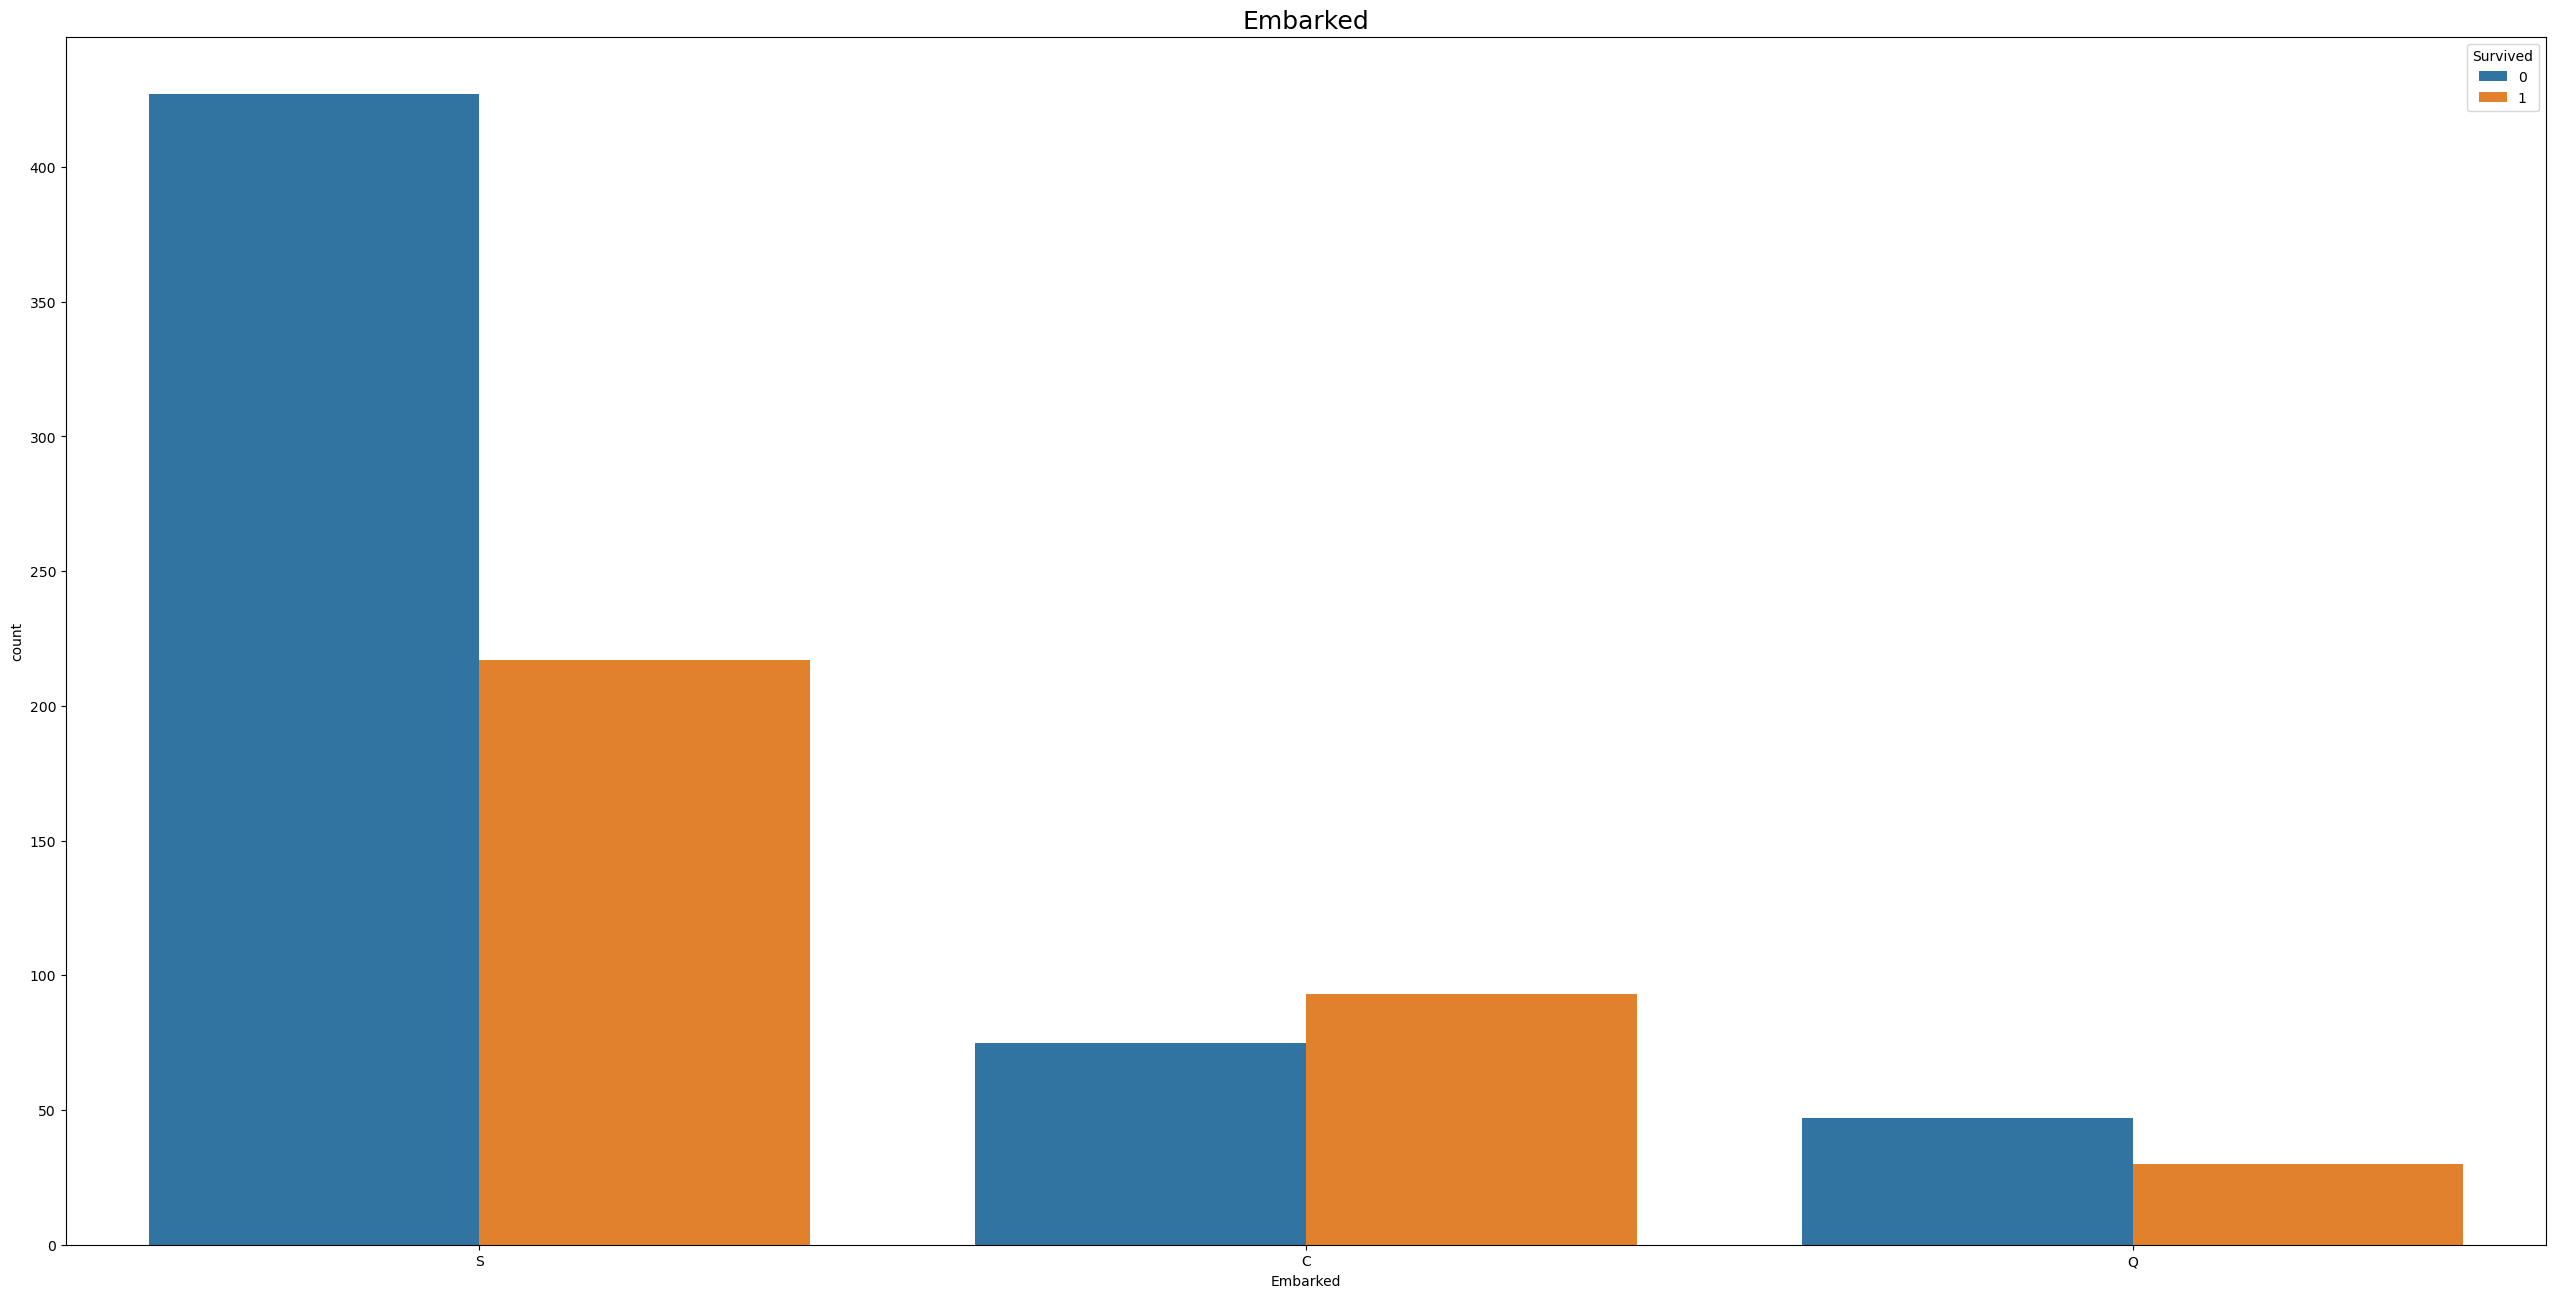

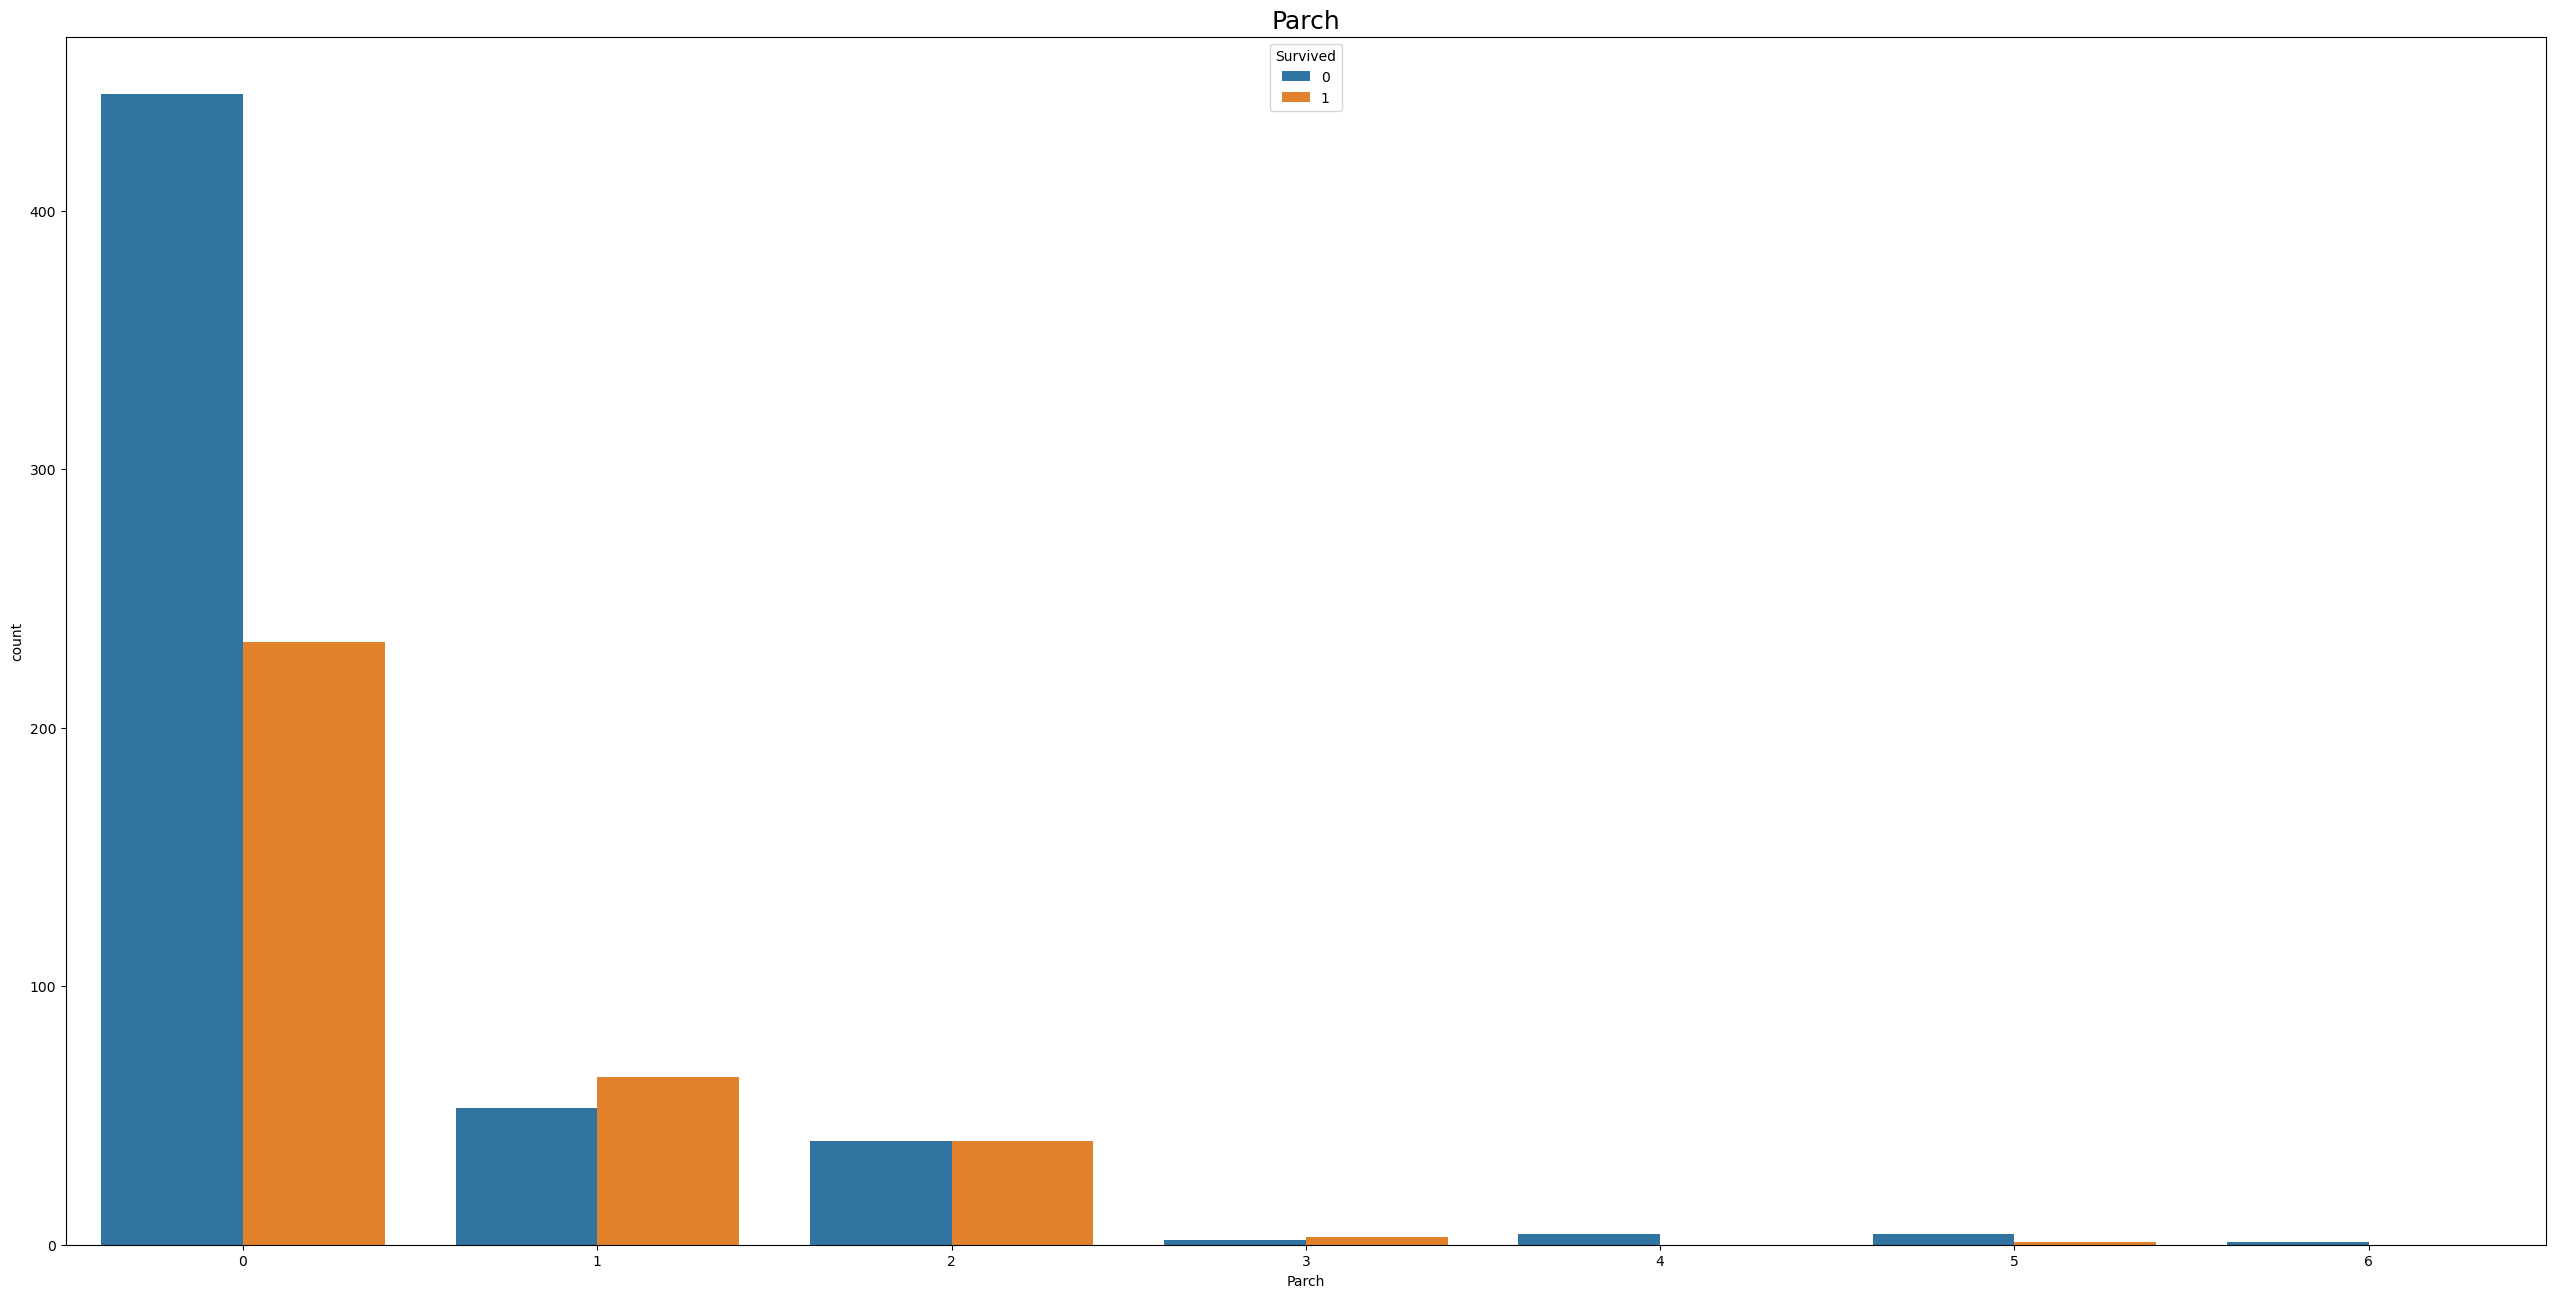

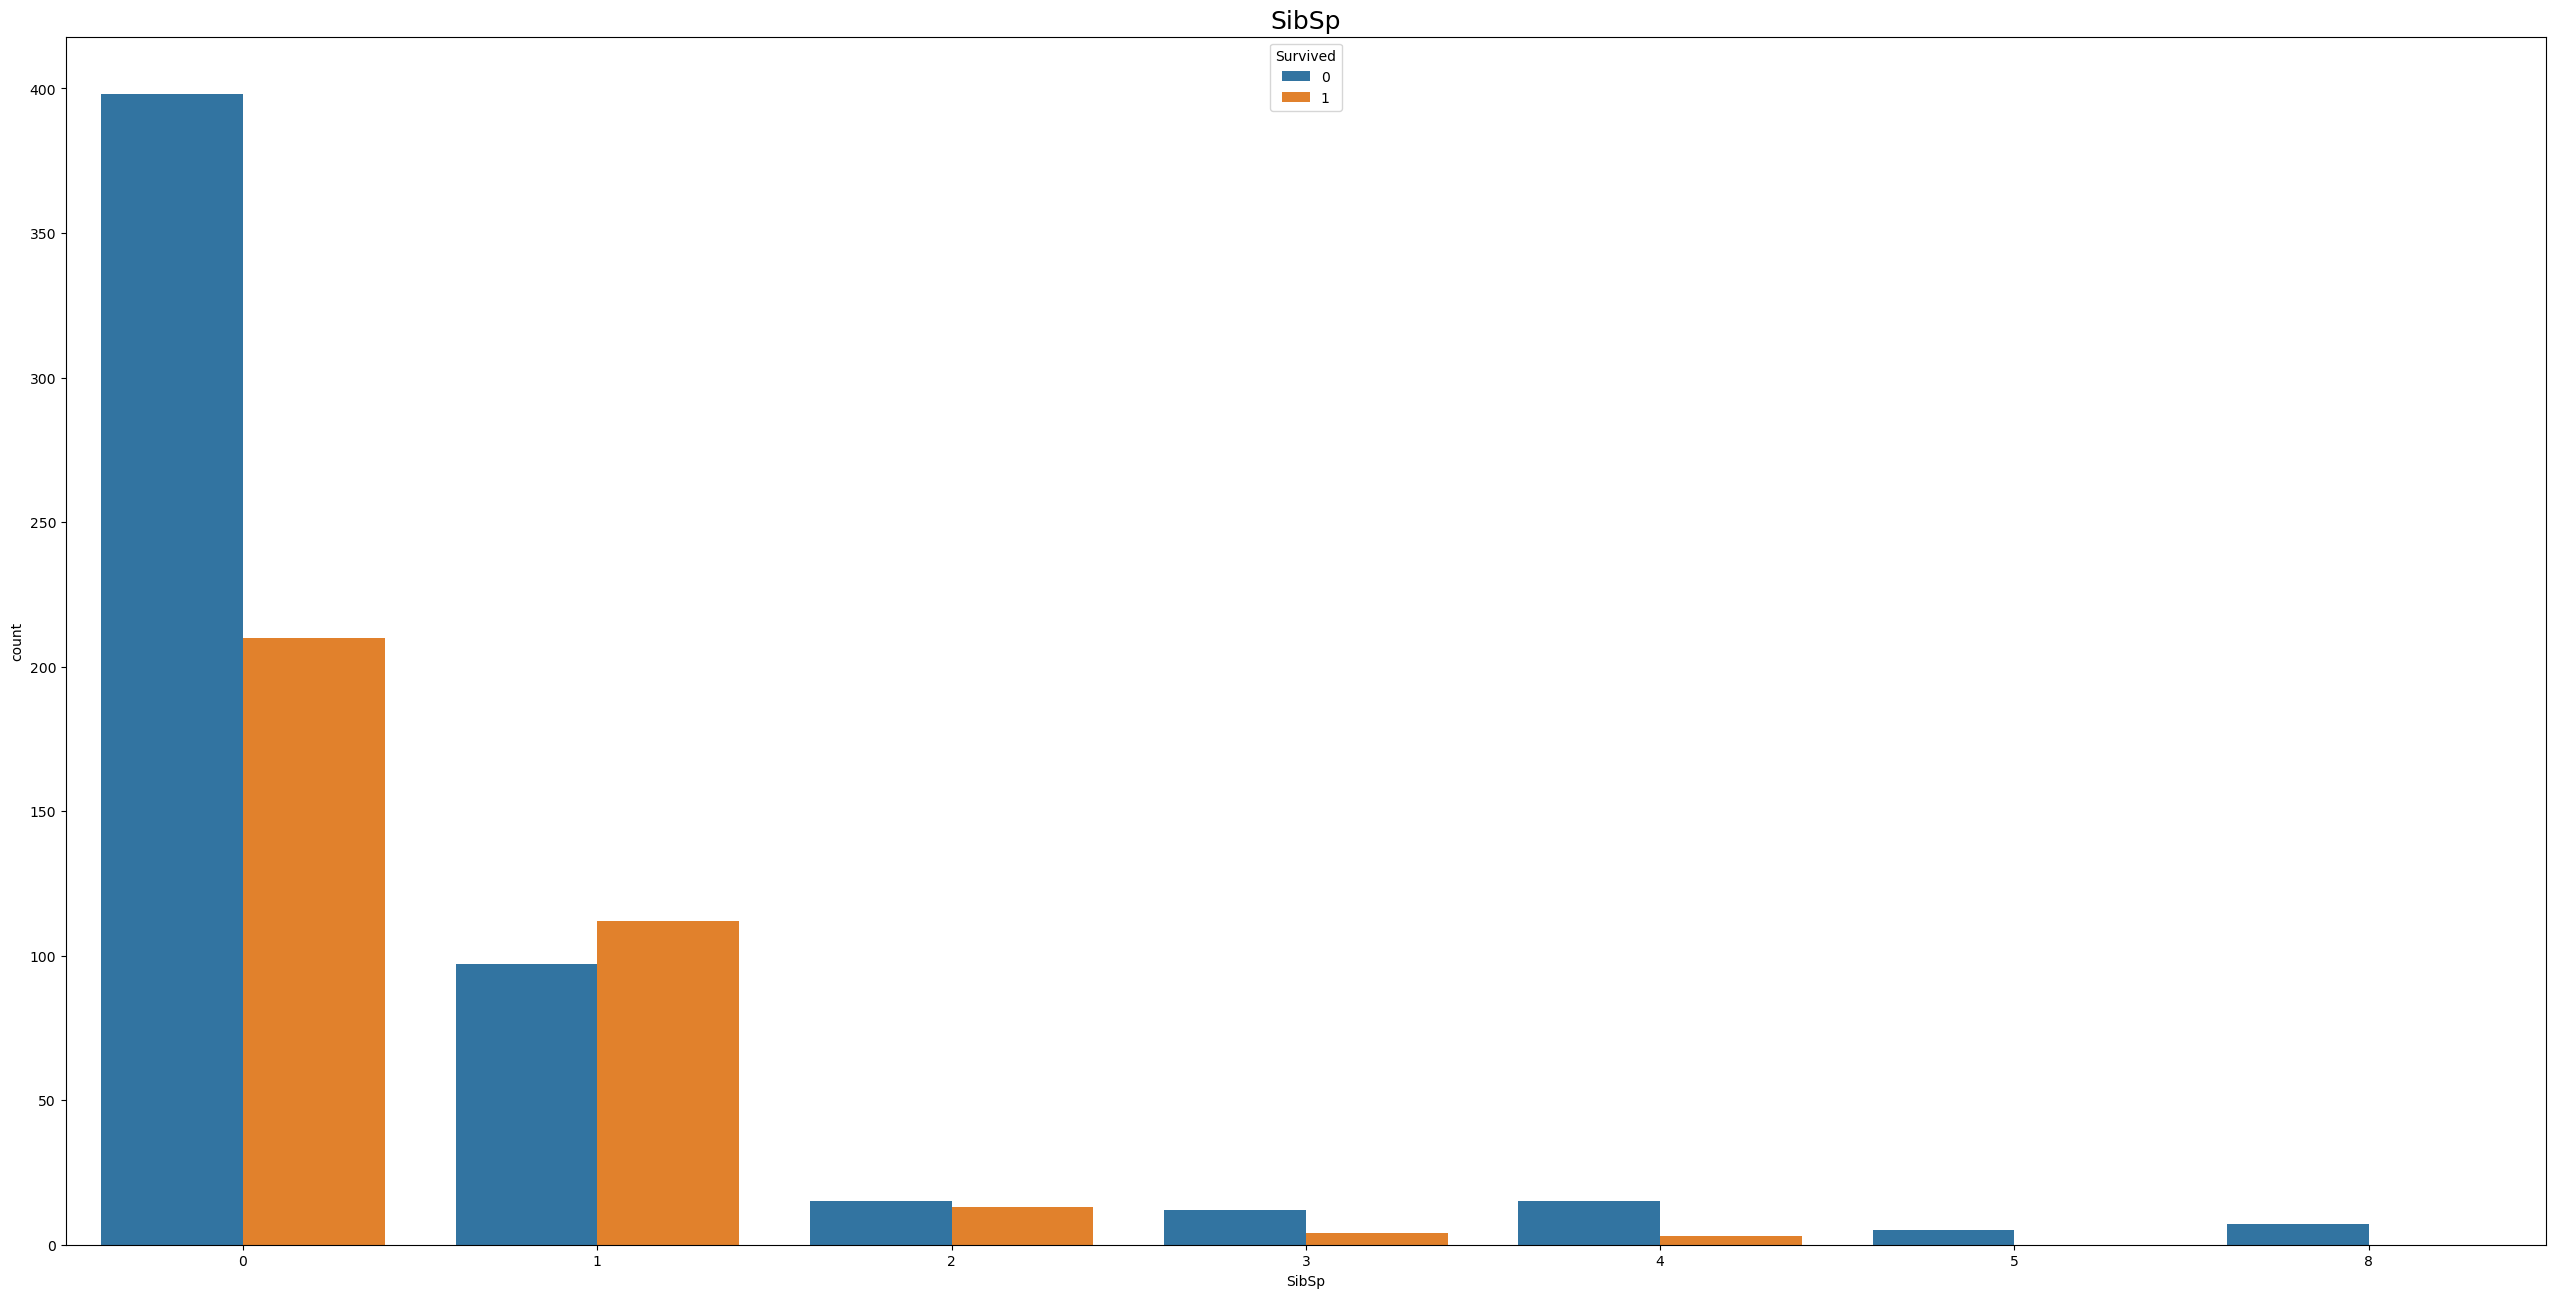

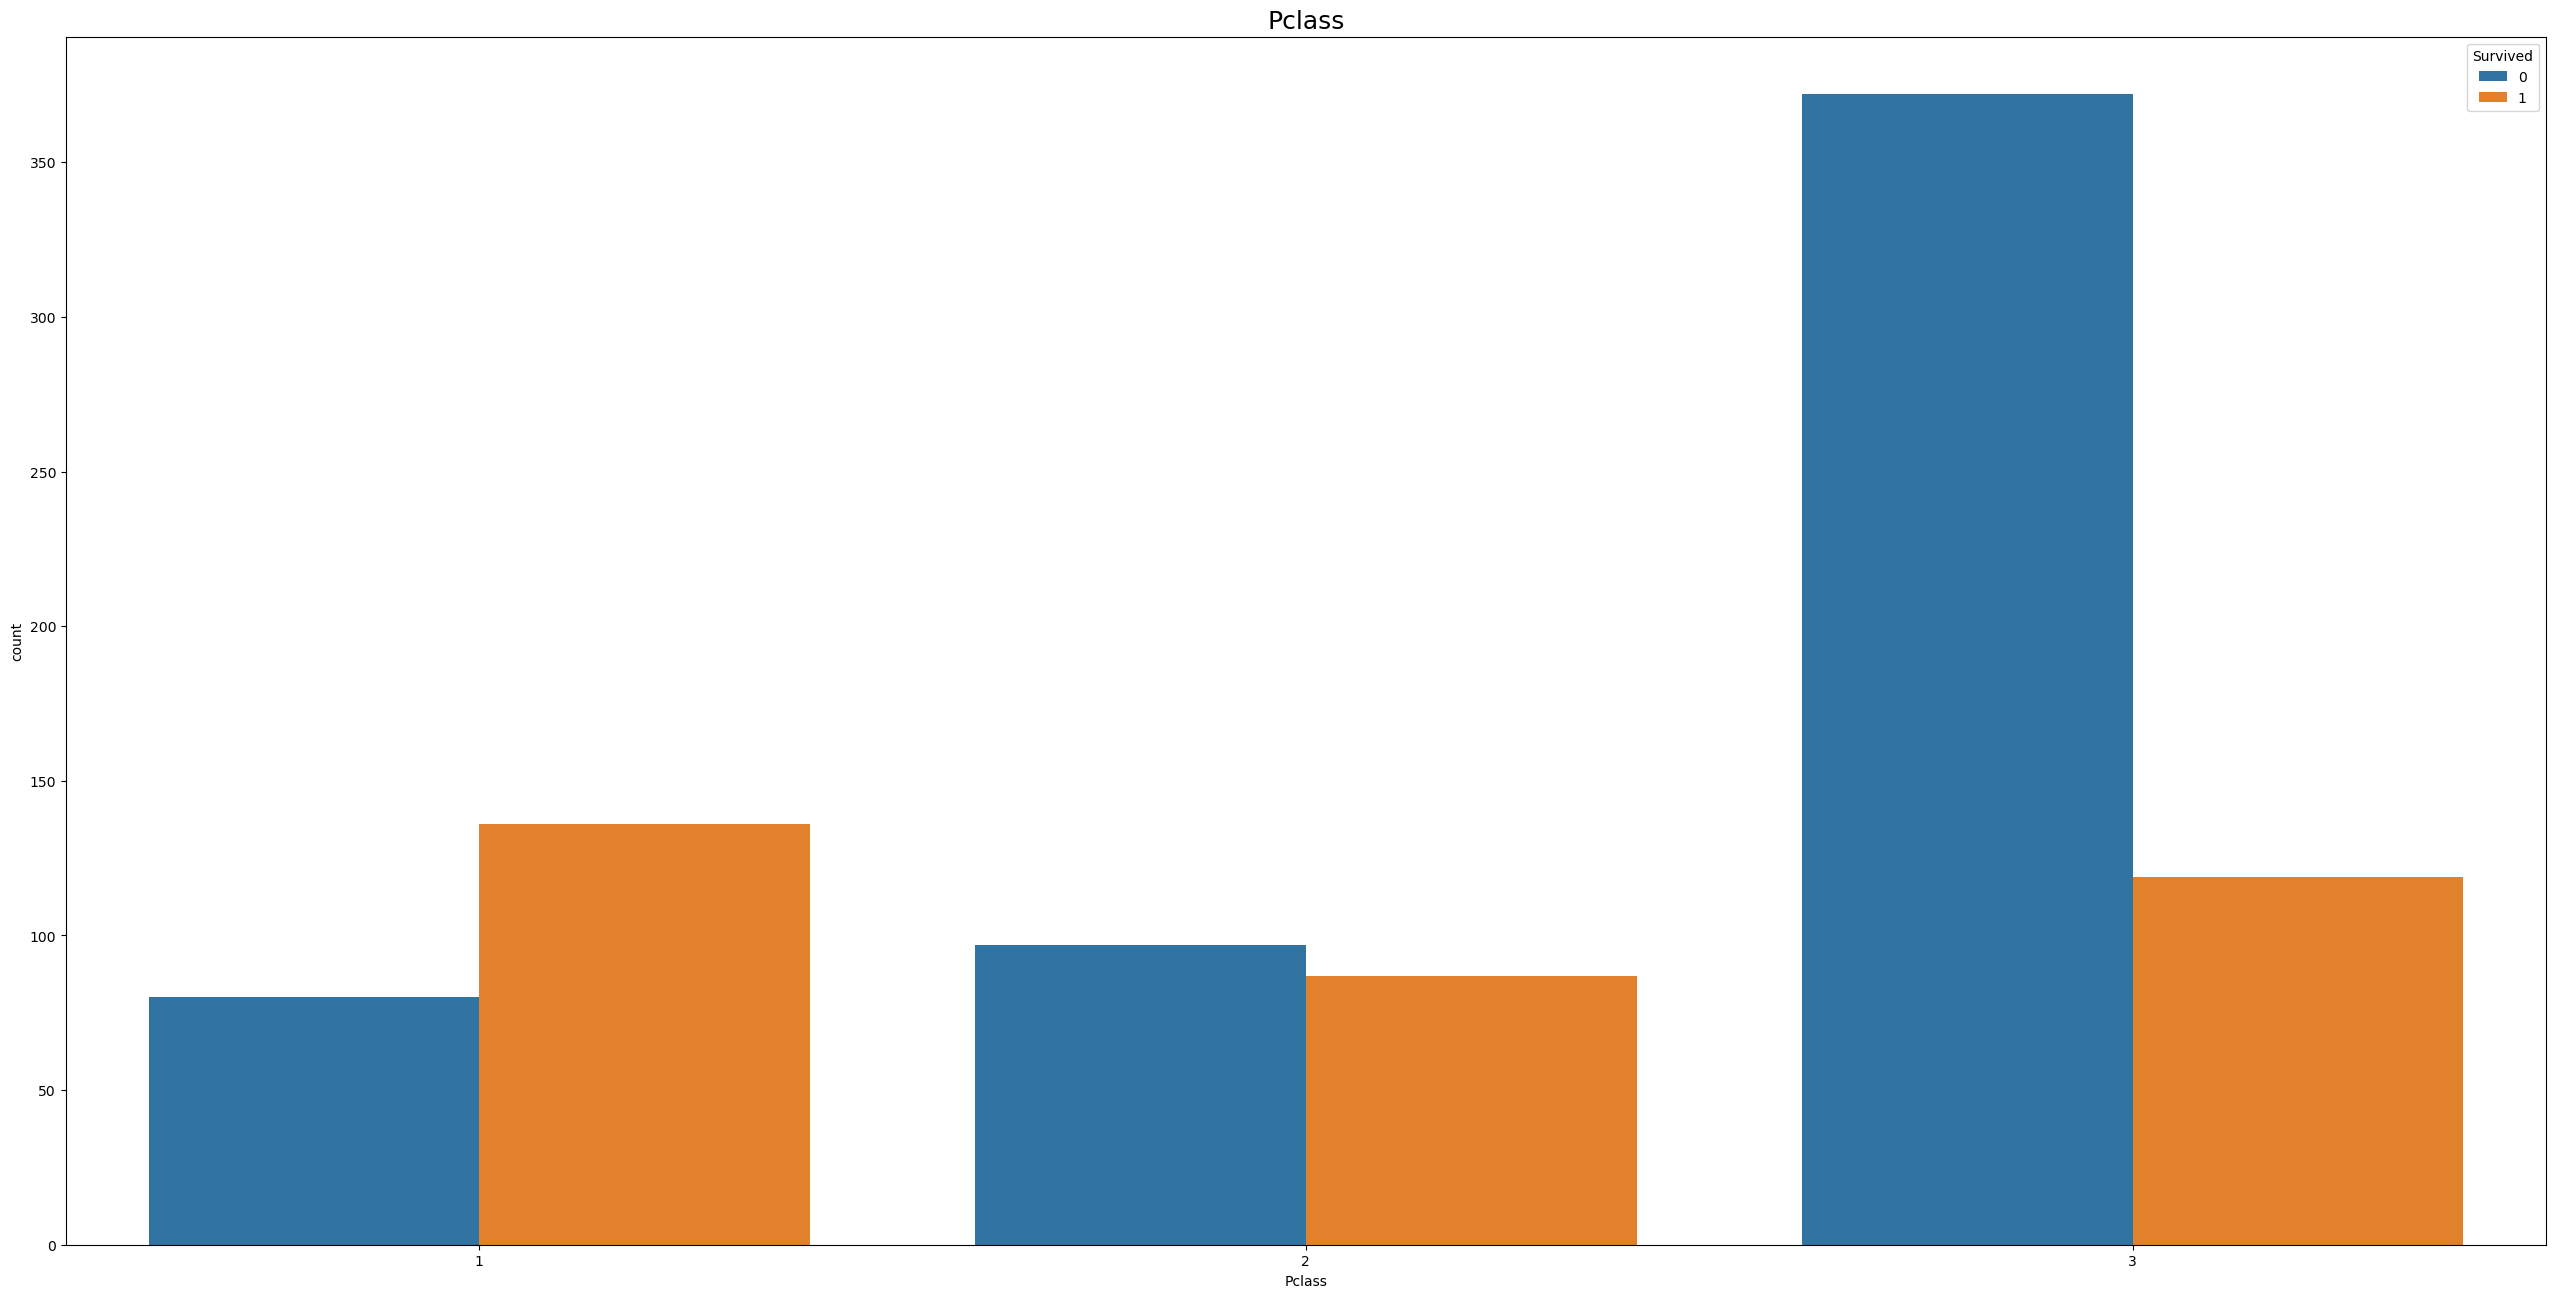

In [83]:
cols = list(train_df.select_dtypes(include=["O"]).columns)
cols.remove("Cabin")
cols.remove("Ticket")
cols.remove("Name")
cols.append("Parch")
cols.append("SibSp")
cols.append("Pclass")
for col in cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.countplot(data=train_df, x=col, hue="Survived");

/home/tom/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tom/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


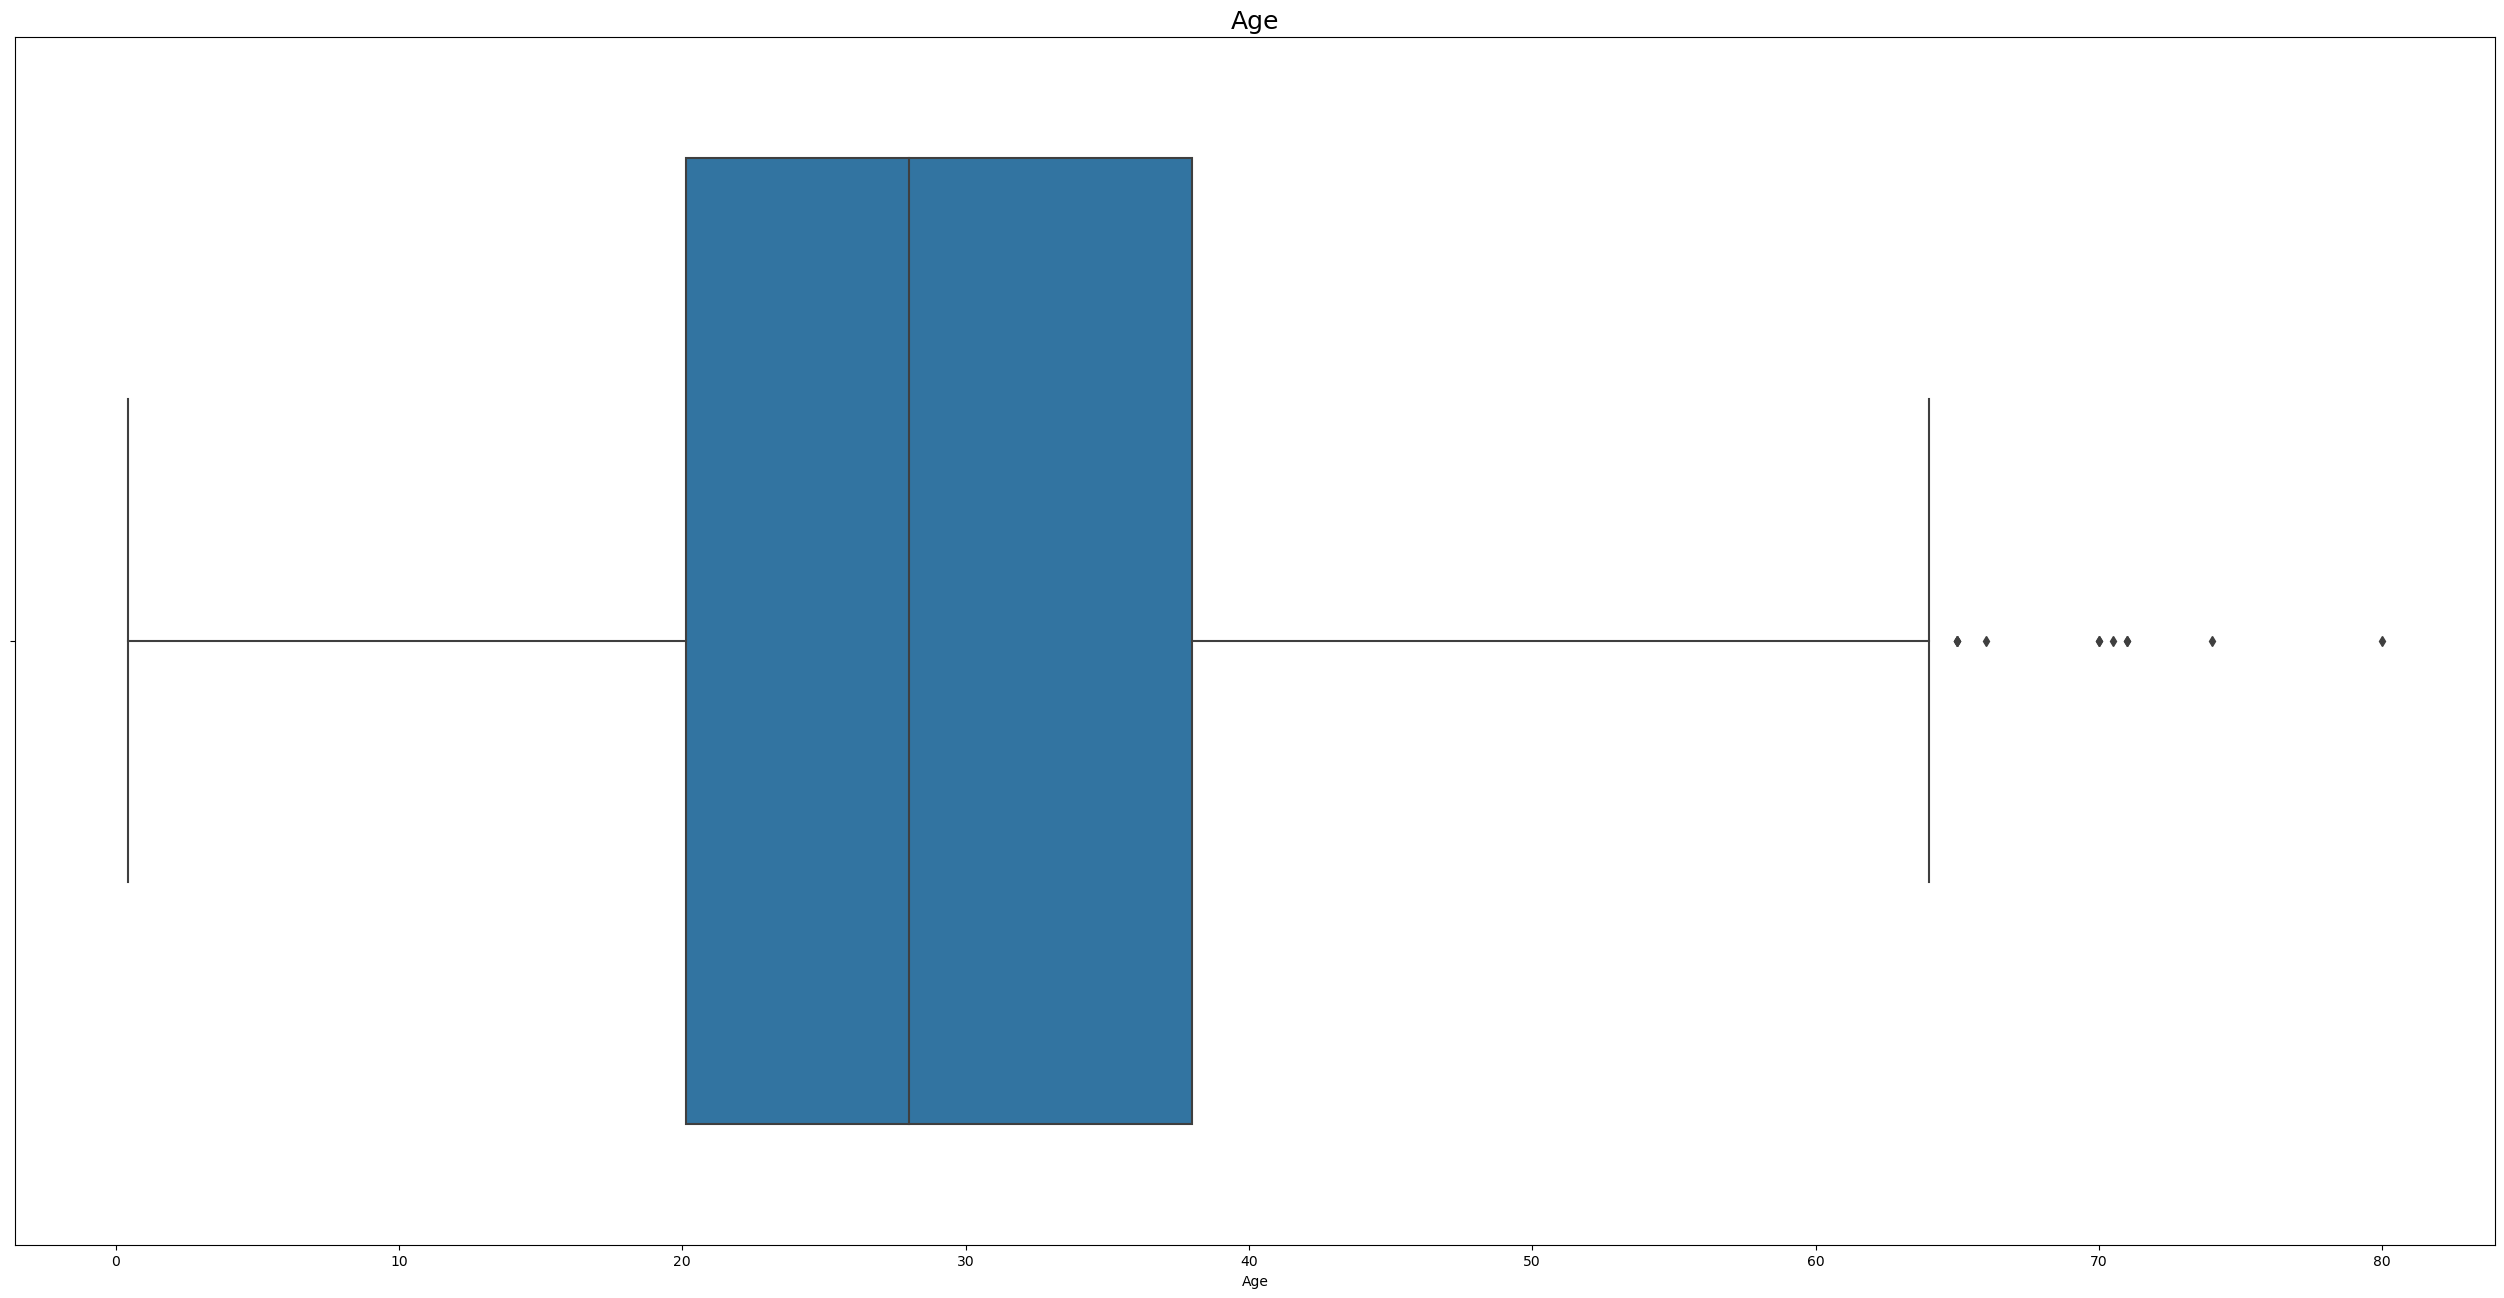

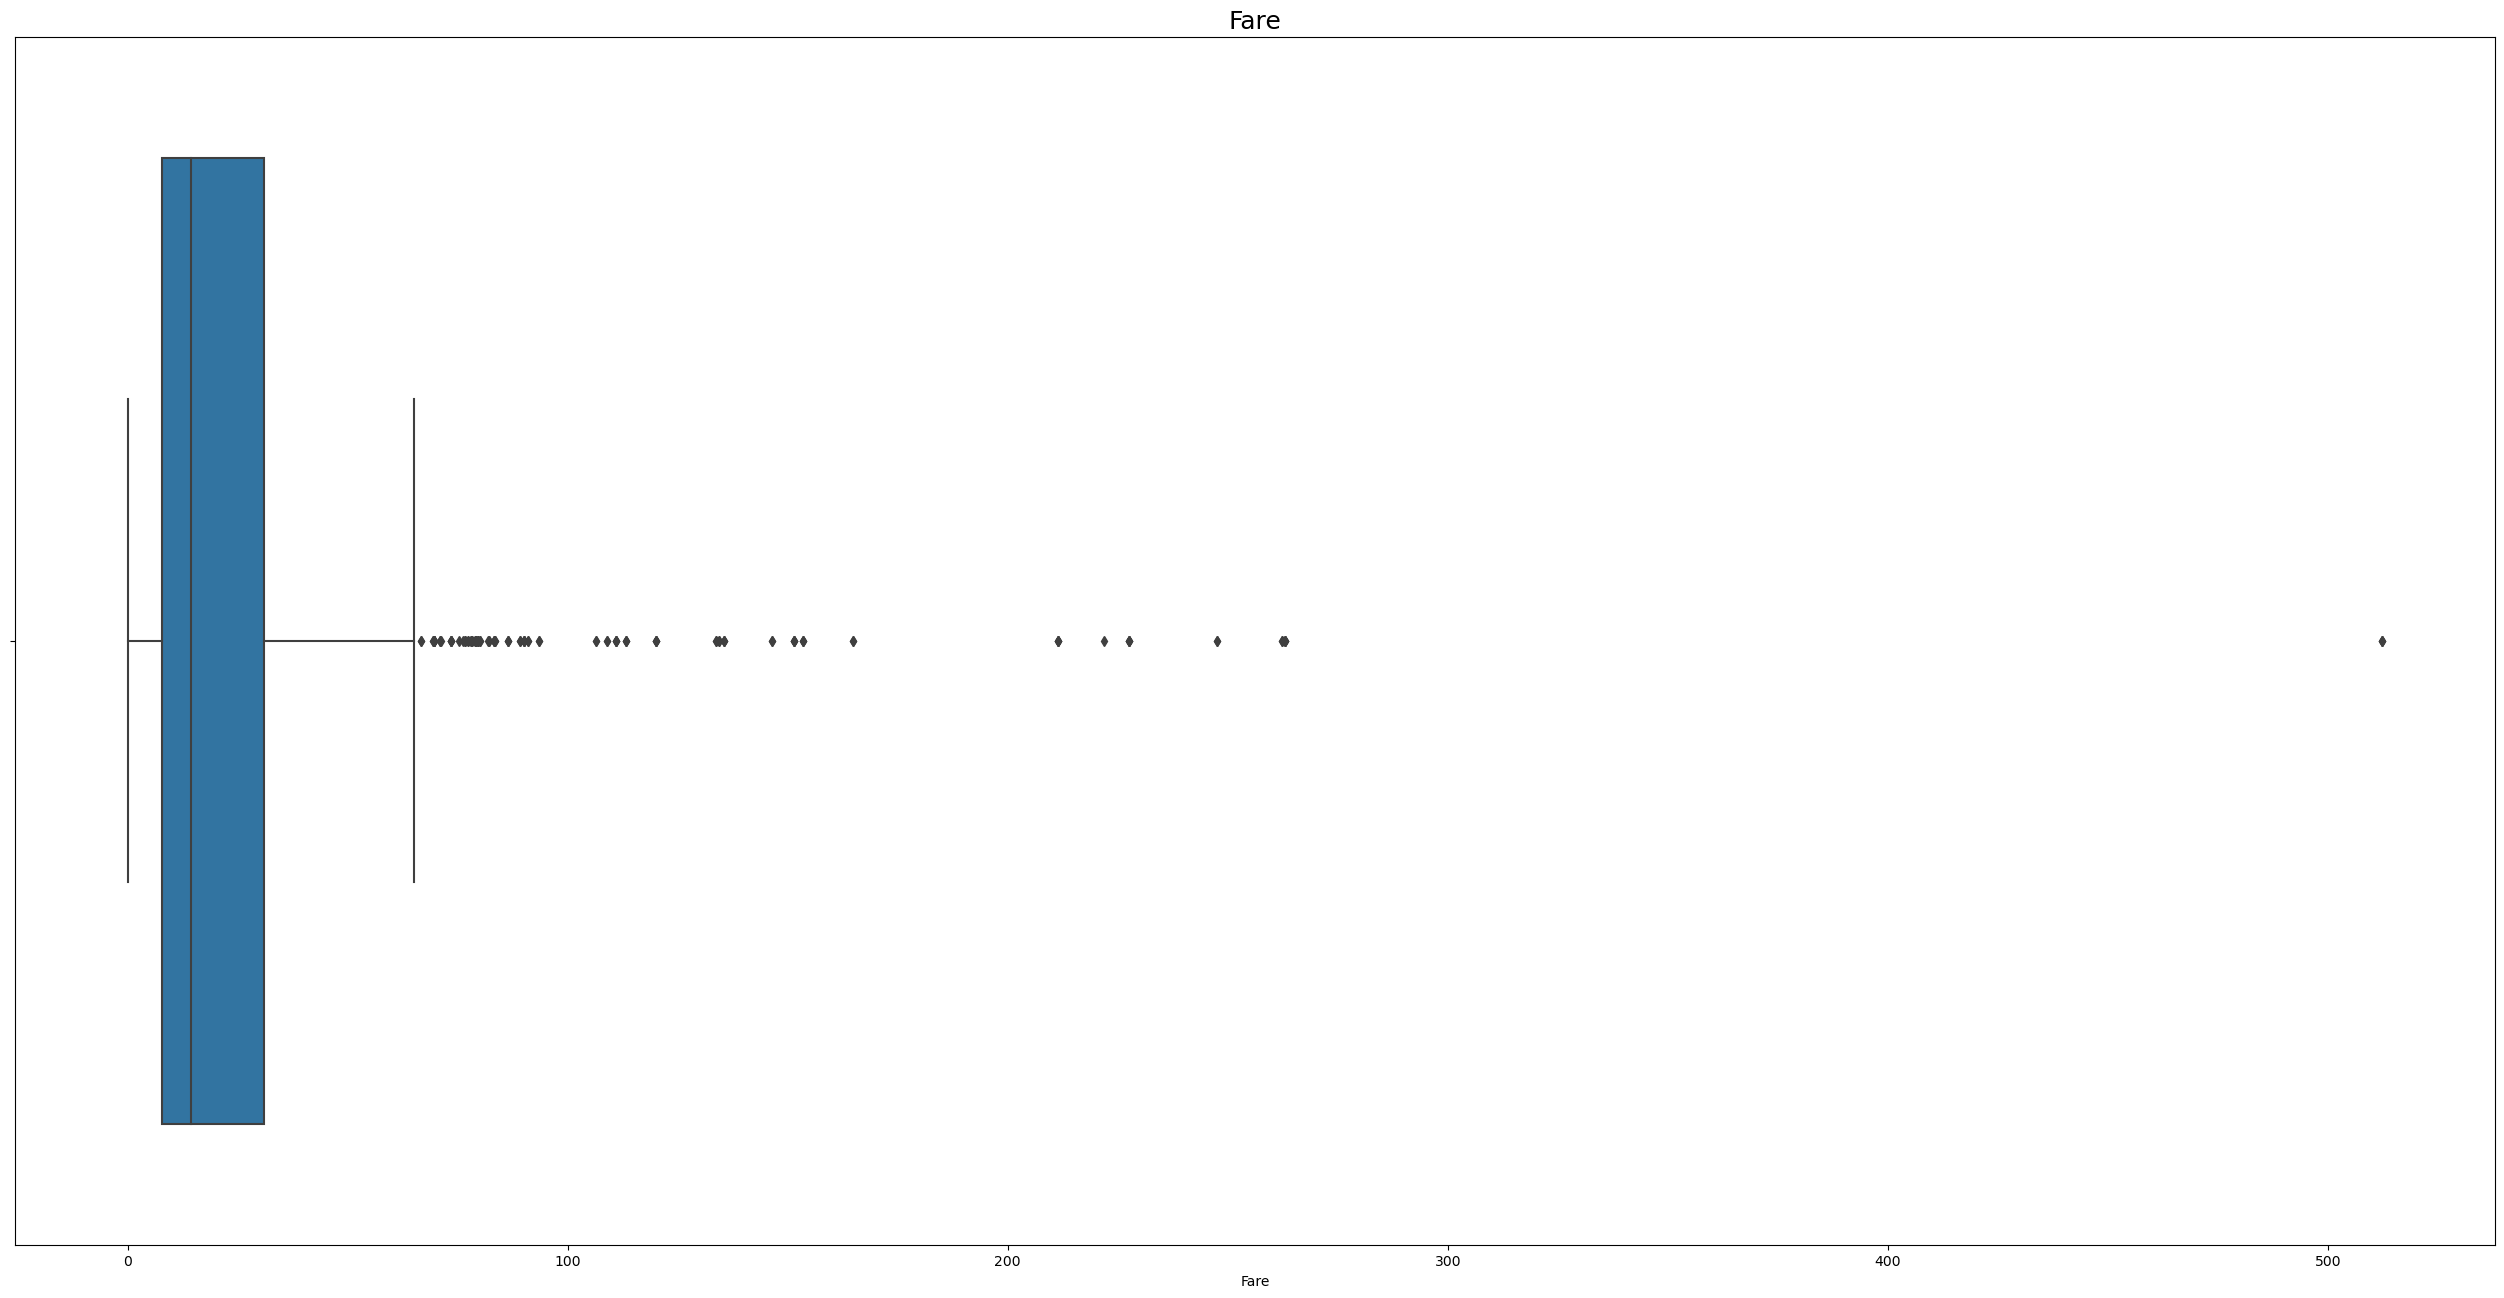

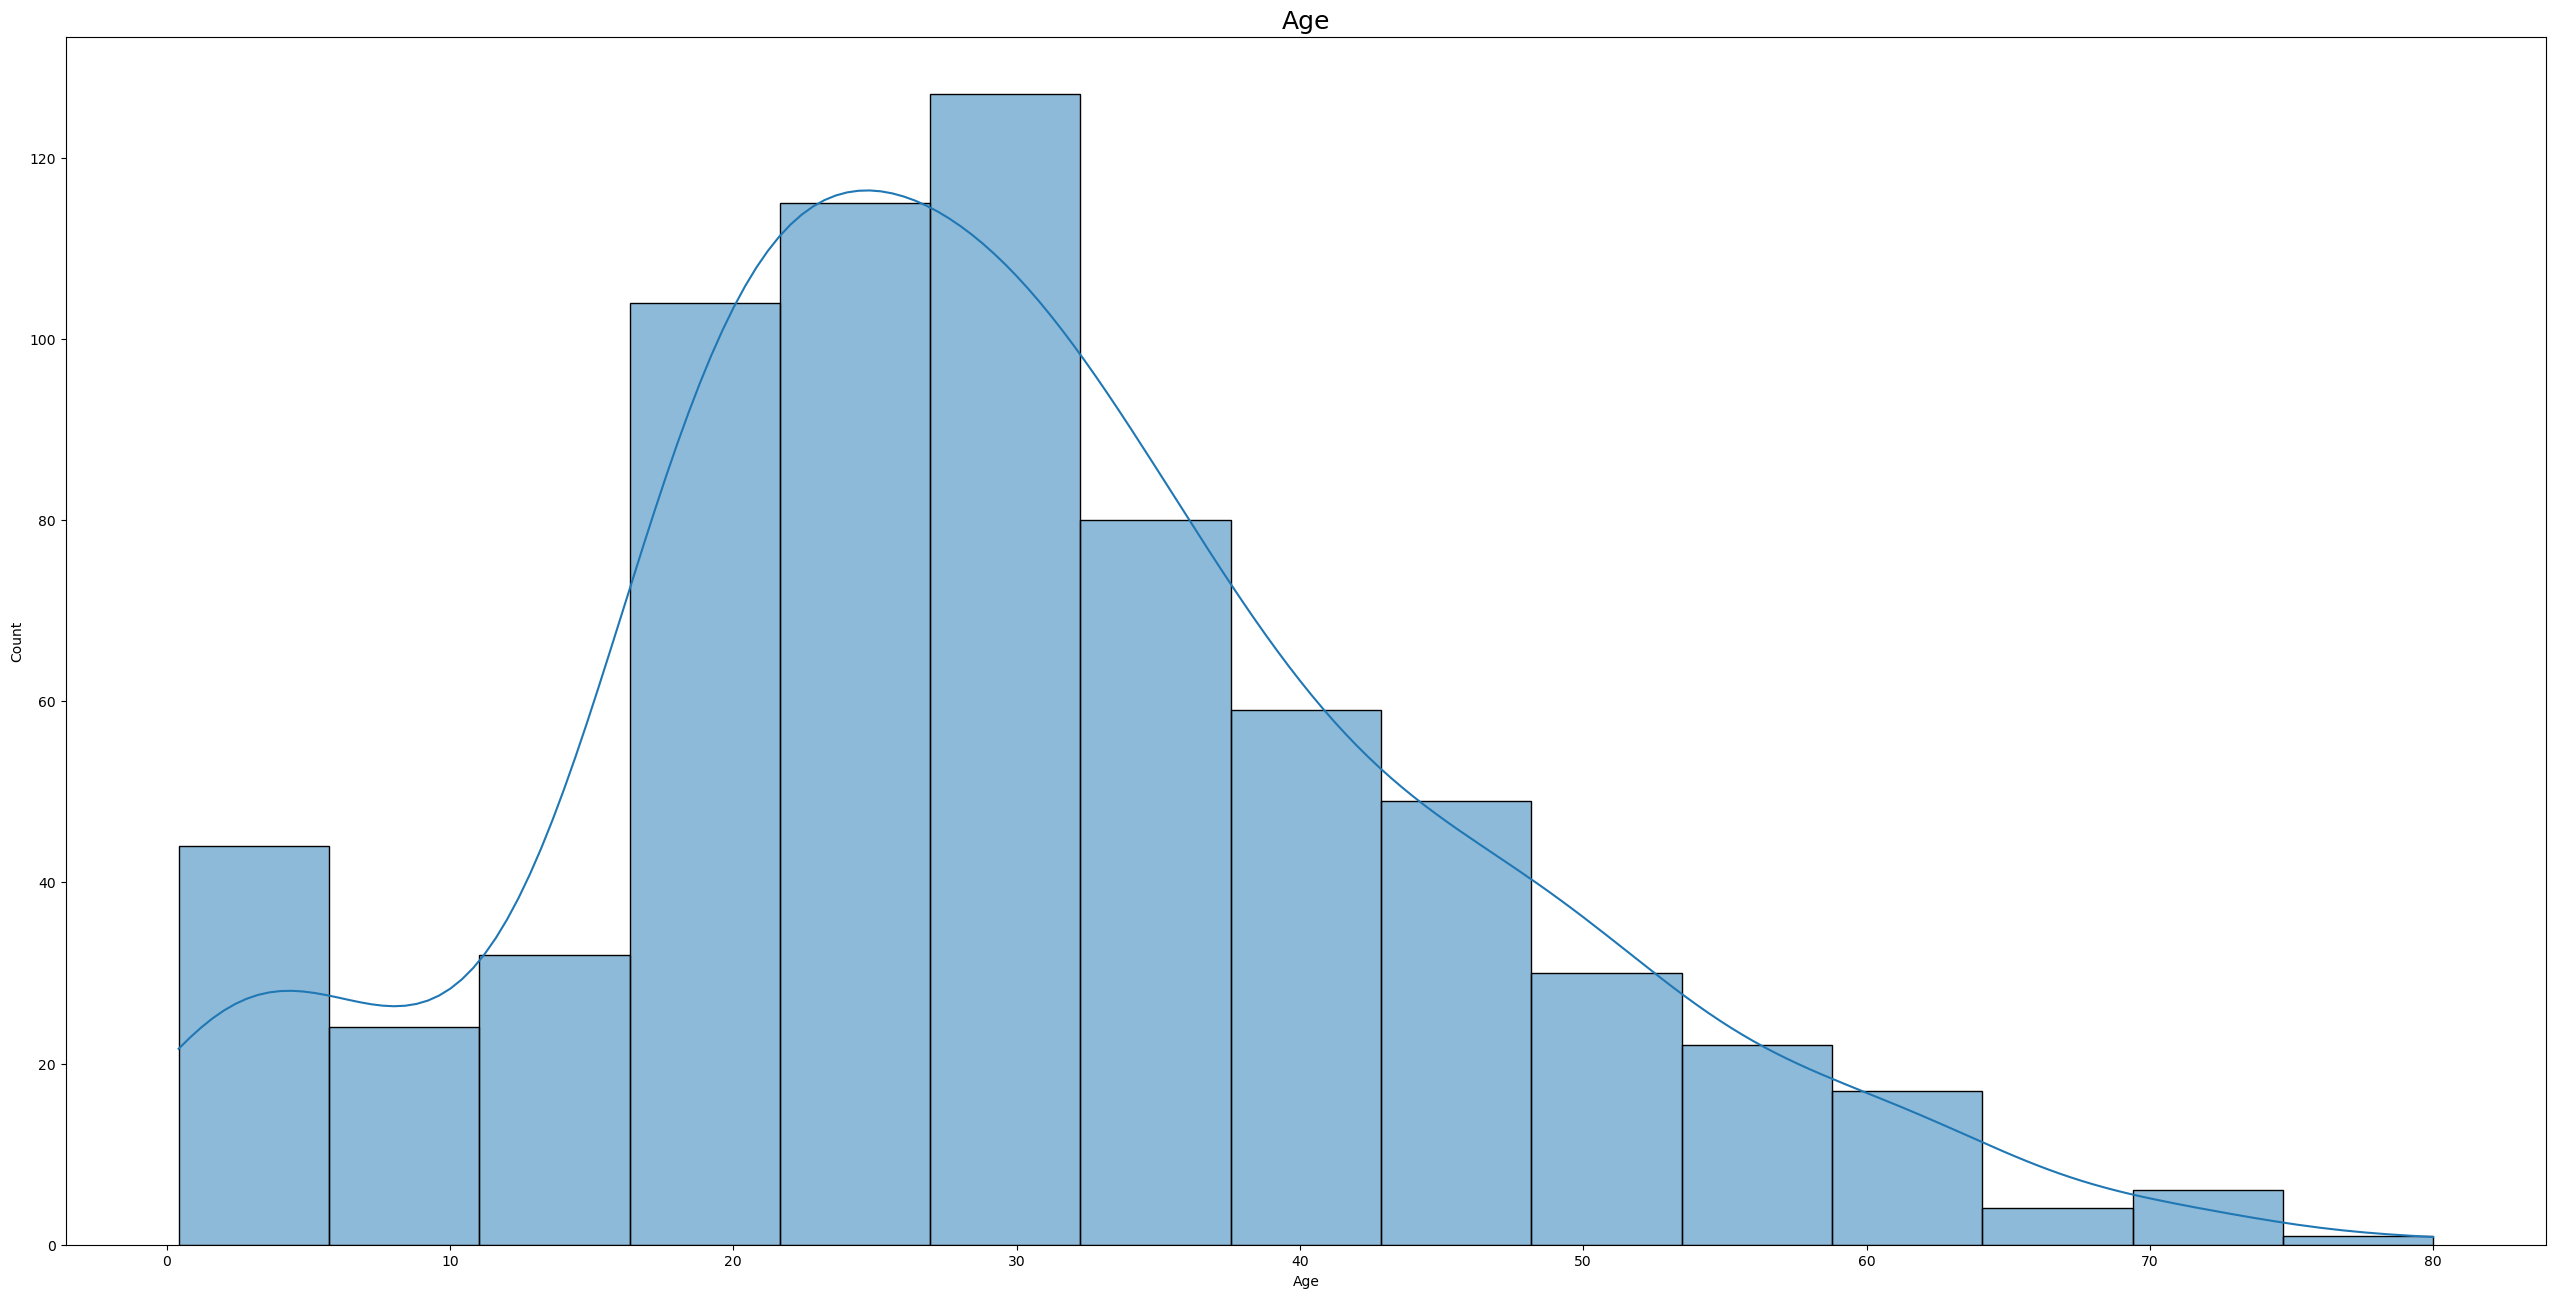

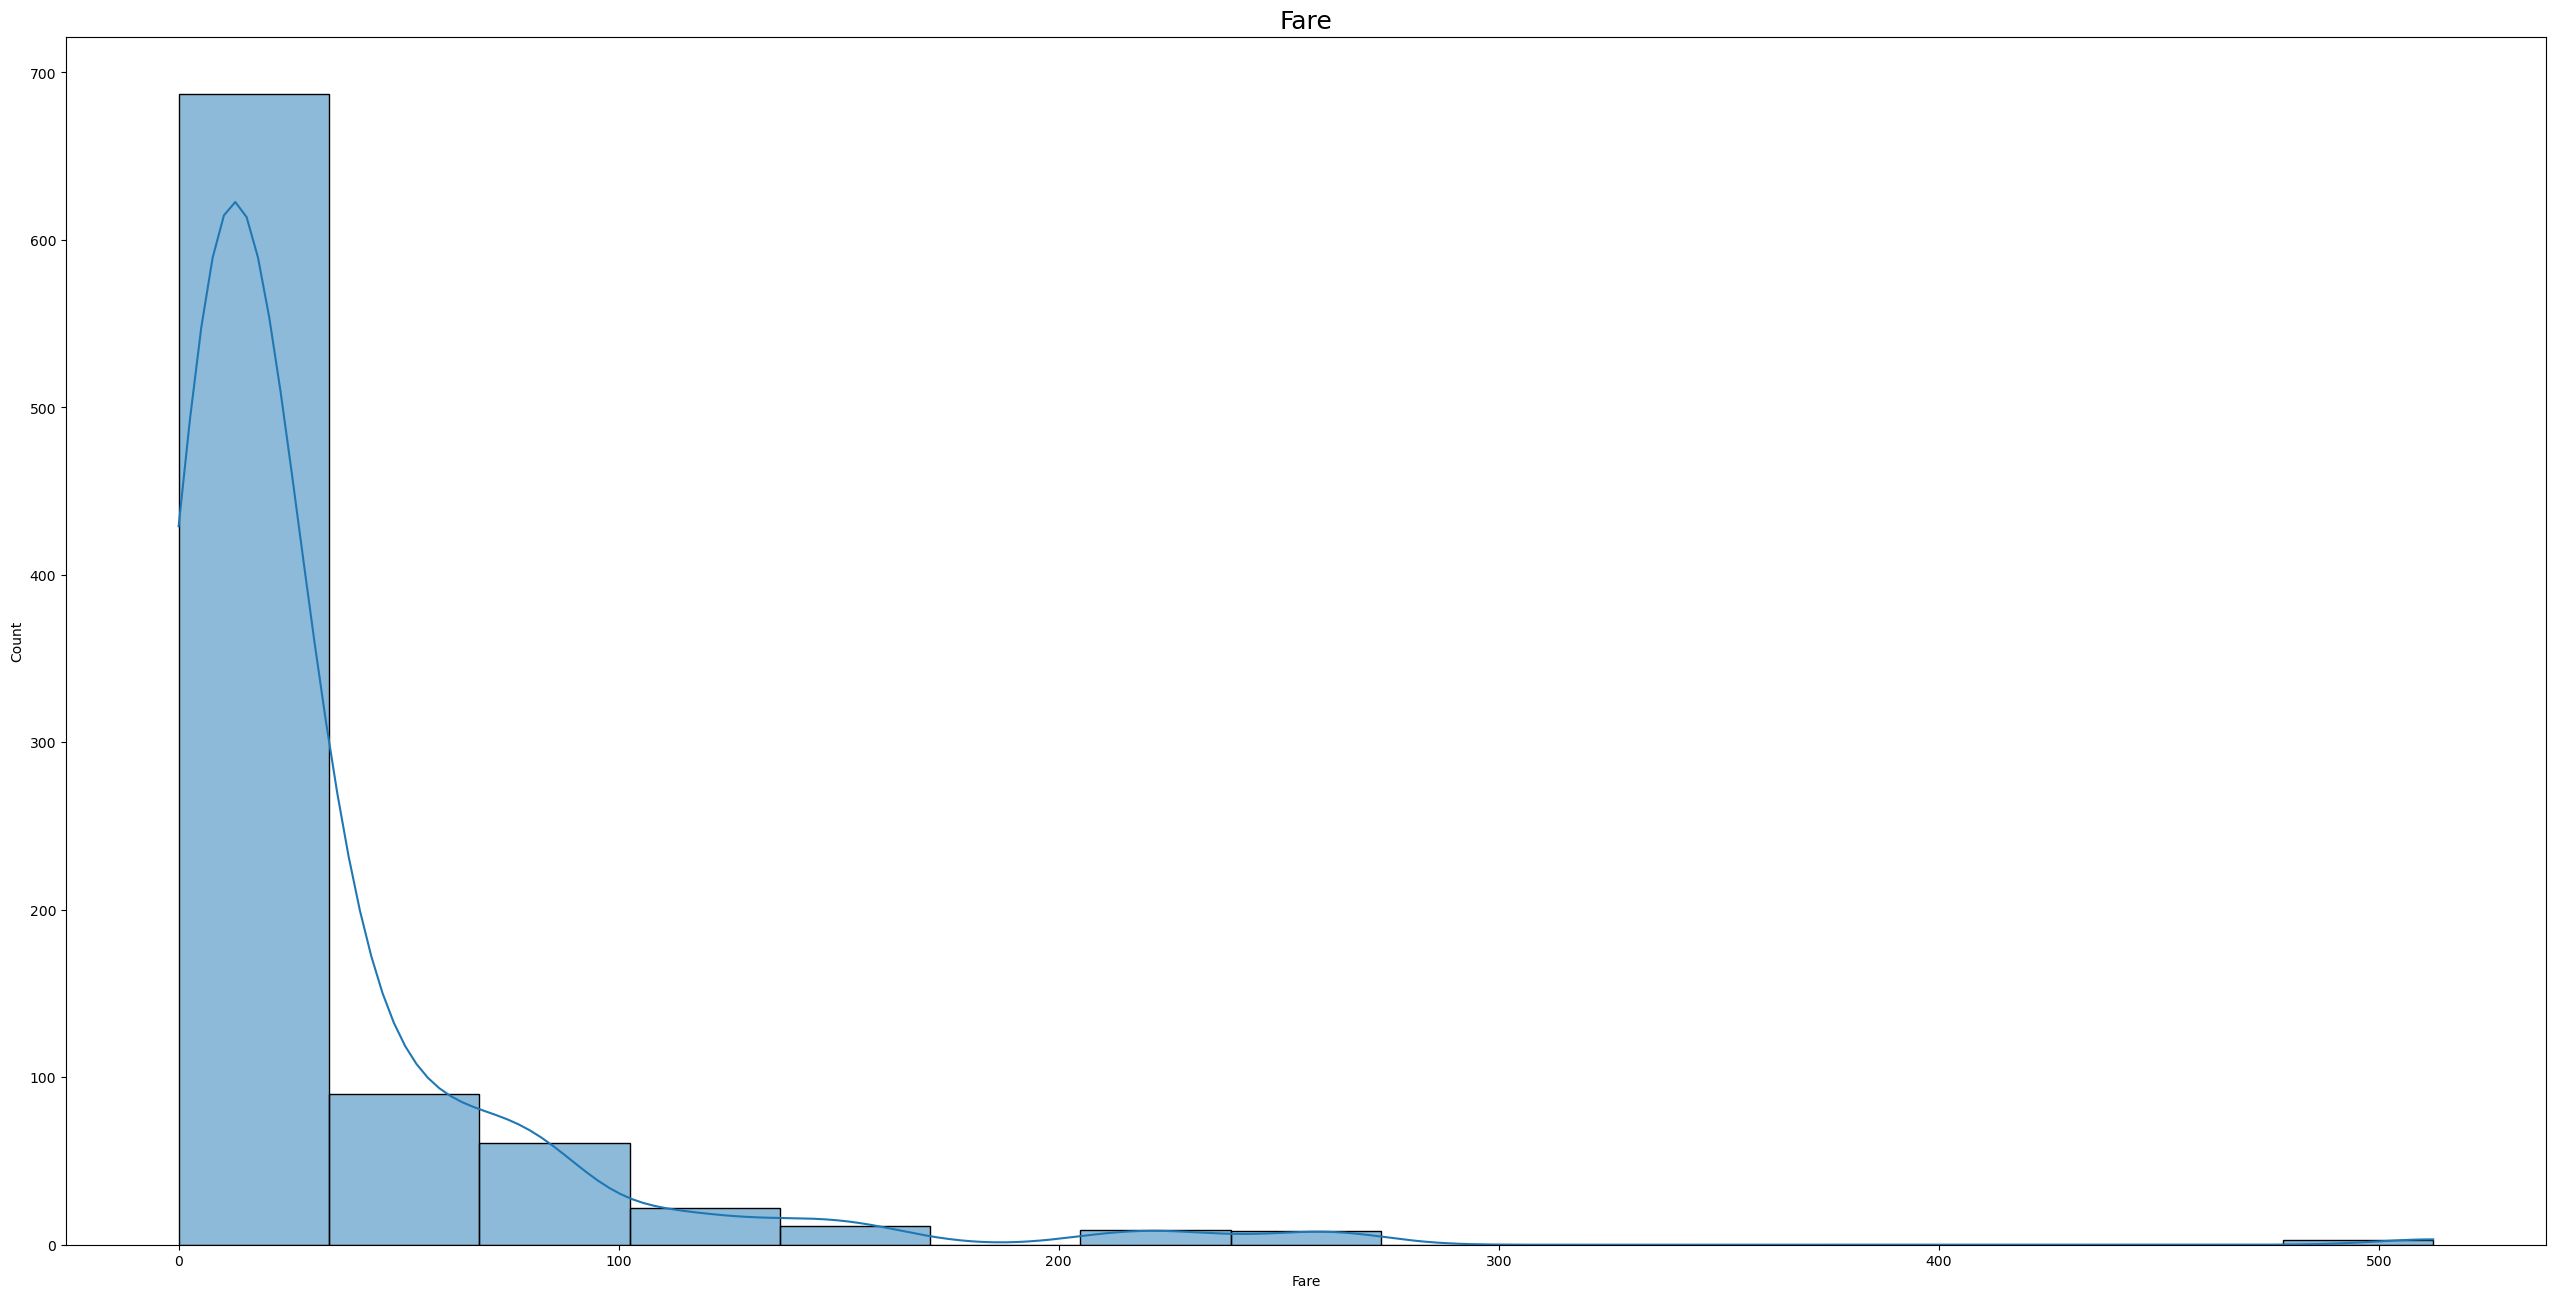

In [84]:
num_cols = list(train_df.select_dtypes(exclude=["O"]).columns)
num_cols.remove("Parch")
num_cols.remove("SibSp")
num_cols.remove("Survived")
num_cols.remove("PassengerId")
num_cols.remove("Pclass")

for col in num_cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.boxplot(train_df[col]);
    
for col in num_cols:
    plt.figure()
    plt.title(col, fontsize=18)
    sns.histplot(train_df[col], kde=True, bins=15);

# Bi-variate Analysis

In [85]:
train_df[["Survived", "SibSp"]].groupby("SibSp", as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [86]:
train_df[["Survived", "Parch"]].groupby("Parch", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [87]:
train_df[["Survived", "Embarked"]].groupby("Embarked", as_index=False).mean().sort_values("Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [88]:
train_df[["Survived", "Sex"]].groupby("Sex", as_index=False).mean().sort_values("Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


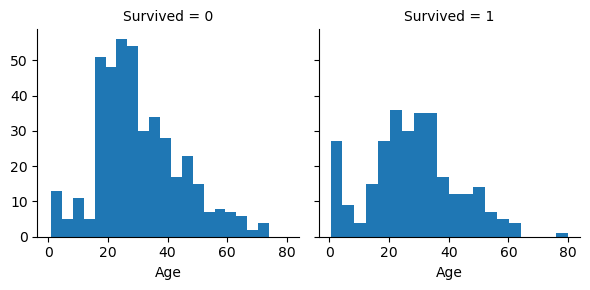

In [89]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20);

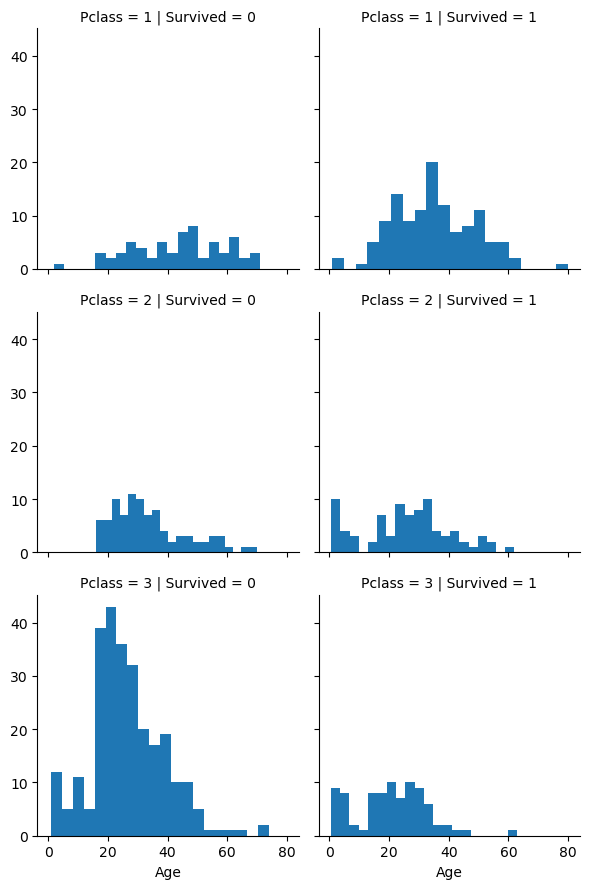

In [90]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, "Age", bins=20);

/home/tom/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/tom/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


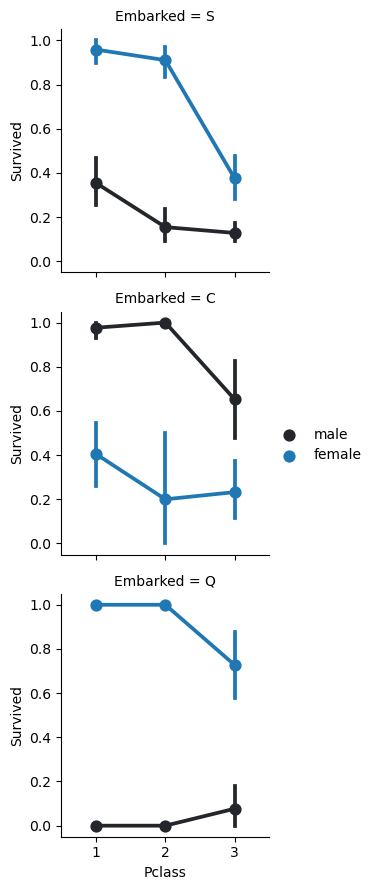

In [91]:
g = sns.FacetGrid(train_df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex");
g.add_legend()

In [92]:
train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)

In [93]:
combine = [train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [94]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [95]:
from sklearn import preprocessing



cols = ["Title", "Sex",]
for col in cols:
    le = preprocessing.LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    print(col, le.classes_)


Title ['Master' 'Miss' 'Mr' 'Mrs' 'Rare']
Sex ['female' 'male']


In [96]:
combine = [train_df, test_df]

guess_ages = np.zeros((2, 3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S,2


In [97]:
dataset["Sex"]

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64